In [1]:
from fly_analysis import braidz
from fly_analysis import filtering
from fly_analysis.processing import extract_stimulus_centered_data
import numpy as np
from matplotlib import pyplot as plt
from fly_analysis.plotting import plot_mean_and_std
from fly_analysis.plotting import plot_trajectory
from datetime import datetime
from scipy import stats
from scipy.stats import mannwhitneyu
from scipy.stats import wilcoxon
from scipy.stats import kruskal
from scipy.stats import friedmanchisquare
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from fly_analysis.trajectory import heading_direction_diff
import matplotlib.ticker as ticker
import os
import csv

In [2]:
df, csvs = braidz.read_braidz(r"C:\\Users\\pandey\\Desktop\\Braidz Files\\20241111_151728.braidz")
df,csvs["opto"]


Reading C:\\Users\\pandey\\Desktop\\Braidz Files\\20241111_151728.braidz using pyarrow


(         obj_id    frame     timestamp         x         y         z  \
 0             0   965547  1.731344e+09  0.127188 -0.009165  0.174098   
 1             0   965548  1.731344e+09  0.126373 -0.007589  0.175381   
 2             0   965549  1.731344e+09  0.125618 -0.006470  0.175477   
 3             0   965550  1.731344e+09  0.124775 -0.005400  0.175226   
 4             0   965551  1.731344e+09  0.123853 -0.004434  0.174818   
 ...         ...      ...           ...       ...       ...       ...   
 4346407  127145  7039472  1.731404e+09  0.189296 -0.108545  0.327187   
 4346408  127145  7039473  1.731404e+09  0.191122 -0.110739  0.328434   
 4346409  127145  7039474  1.731404e+09  0.192948 -0.112933  0.329681   
 4346410  127145  7039475  1.731404e+09  0.194782 -0.114512  0.336514   
 4346411  127145  7039476  1.731404e+09  0.197074 -0.115527  0.341265   
 
              xvel      yvel      zvel           P00           P01  \
 0       -0.135866  0.181873  0.176744  5.309161e-08

In [4]:
data = extract_stimulus_centered_data(df, csvs["opto"])

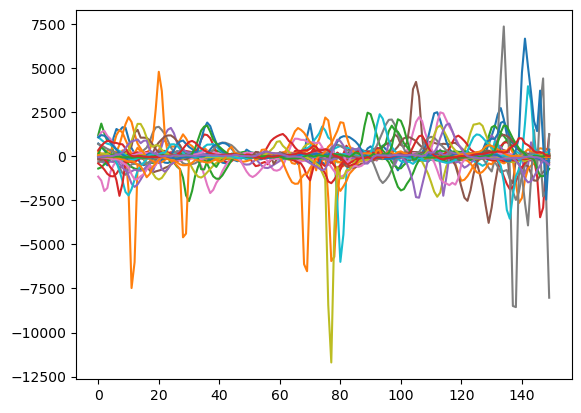

In [5]:
fig = plt.figure()
for d in data["angular_velocity"]:
    plt.plot(d)
plt.show()

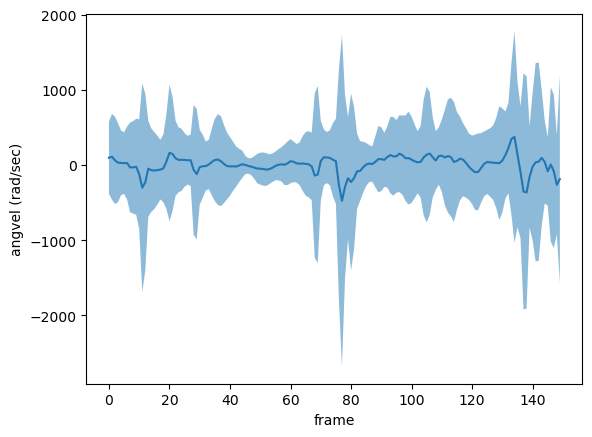

In [6]:
fig, ax = plt.subplots()
plot_mean_and_std(np.array(data["angular_velocity"]), ax=ax)
ax.set_xlabel("frame")
ax.set_ylabel("angvel (rad/sec)")
plt.show()

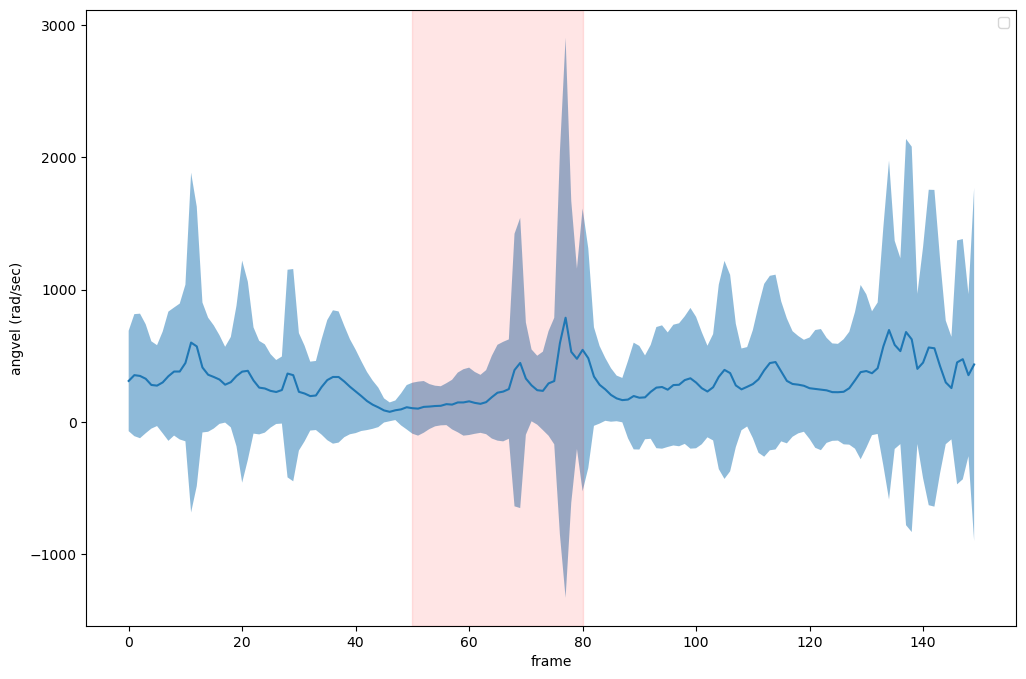

In [7]:
# Creating the plot with a specific figure size
plt.figure(figsize=(12, 8))
ax = plt.gca()  # Get current axes

# Plotting data and setting labels
plot_mean_and_std(np.abs(np.array(data["angular_velocity"])), ax=ax)
ax.set_xlabel("frame")
ax.set_ylabel("angvel (rad/sec)")
ax.axvspan(50, 80, color='red', alpha=0.1)
ax.legend()
plt.show()

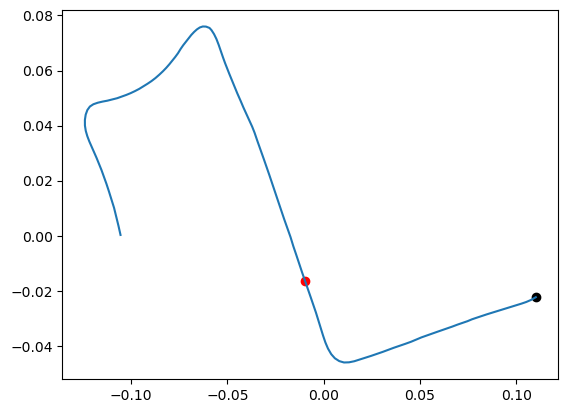

In [9]:
i = 12
traj = data["position"][i]

fig = plt.figure()
plt.plot(traj[:,0], traj[:,1])
plt.scatter(traj[50,0], traj[50,1], color="red")
plt.scatter(traj[0,0], traj[0,1], color="black")
plt.show()

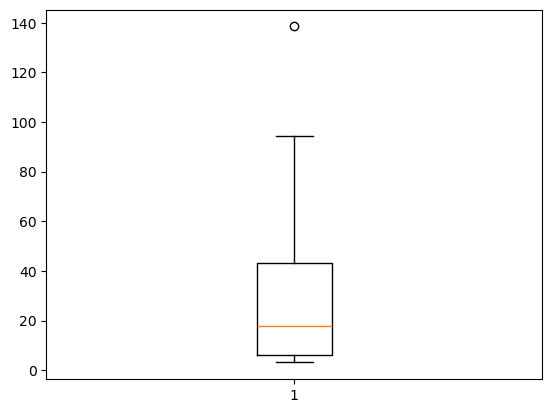

In [10]:
heading_diffs = []
for traj in data["position"]:
    heading_diffs.append(heading_direction_diff(traj, origin=50, end=80, n=10))

plt.figure()
plt.boxplot(np.abs(heading_diffs))
plt.show()

In [11]:
timestamp_column = csvs["opto"]["timestamp"]
print(timestamp_column)
timestamp_column.to_csv('timestamp_output.csv', index=False)

0     1.731344e+09
1     1.731346e+09
2     1.731346e+09
3     1.731347e+09
4     1.731347e+09
5     1.731348e+09
6     1.731348e+09
7     1.731348e+09
8     1.731349e+09
9     1.731349e+09
10    1.731350e+09
11    1.731352e+09
12    1.731354e+09
13    1.731355e+09
14    1.731355e+09
15    1.731356e+09
16    1.731357e+09
17    1.731358e+09
18    1.731359e+09
19    1.731359e+09
20    1.731361e+09
21    1.731361e+09
22    1.731363e+09
23    1.731367e+09
24    1.731369e+09
25    1.731369e+09
26    1.731369e+09
27    1.731369e+09
28    1.731370e+09
29    1.731372e+09
30    1.731373e+09
31    1.731373e+09
32    1.731373e+09
33    1.731374e+09
34    1.731374e+09
35    1.731374e+09
36    1.731379e+09
37    1.731381e+09
38    1.731384e+09
39    1.731387e+09
40    1.731391e+09
41    1.731391e+09
Name: timestamp, dtype: float64
